# import prerequistieqs

In [57]:
import qiskit
import matplotlib as plt
from qiskit_aer import Aer,AerSimulator
from qiskit.visualization import plot_bloch_multivector , plot_histogram
import numpy as np 
from math import pi
from qiskit_textbook.tools import array_to_latex

# constant oracle

1


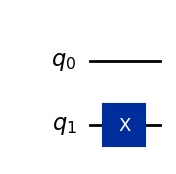

In [ ]:
constant_oracle = qiskit.QuantumCircuit(2)  # Create a quantum circuit with 2 qubits

out = np.random.randint(2)  # Generate a random integer (0 or 1)
if out == 1:  
    constant_oracle.x(1)  # Apply an X (NOT) gate to the second qubit if out is 1

constant_oracle.draw('mpl')  # Draw the quantum circuit using Matplotlib
# this is our constant oracle

# balanced oracle

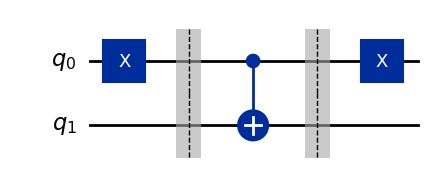

In [59]:
balanced_oracle = qiskit.QuantumCircuit(2)  # Create a quantum circuit with 2 qubits

balanced_oracle.x(0)  # Apply an X (NOT) gate to the first qubit

balanced_oracle.barrier()  # Add a barrier to visually separate different operations

balanced_oracle.cx(0, 1)  # Apply a CNOT (Controlled-NOT) gate with qubit 0 as control and qubit 1 as target

balanced_oracle.barrier()  # Add another barrier for clarity

balanced_oracle.x(0)  # Apply another X (NOT) gate to the first qubit

balanced_oracle.draw('mpl')  # Draw the quantum circuit using Matplotlib
# this is our balanced oracle

# constant case

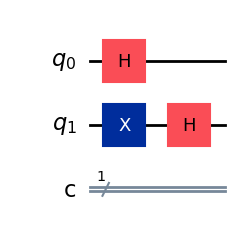

In [60]:
Dj = qiskit.QuantumCircuit(2, 1)  # Create a quantum circuit with 2 qubits and 1 classical bit

Dj.h(0)  # Apply a Hadamard gate to the first qubit (creates superposition)

Dj.x(1)  # Apply an X (NOT) gate to the second qubit (flips its state)

Dj.h(1)  # Apply a Hadamard gate to the second qubit 

Dj.draw('mpl')  # Draw the quantum circuit using Matplotlib


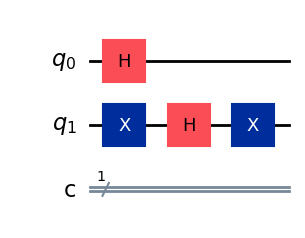

In [61]:
qc = Dj.compose(constant_oracle)  # Combine (compose) the Dj circuit with the constant oracle

qc.draw('mpl')  # Draw the composed quantum circuit using Matplotlib


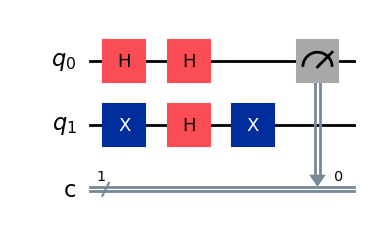

In [62]:
qc.h(0)  # Apply a Hadamard gate to the first qubit to interfere and extract information

qc.measure(0, 0)  # Measure the first qubit and store the result in the classical bit 0

qc.draw('mpl')  # Draw the quantum circuit using Matplotlib


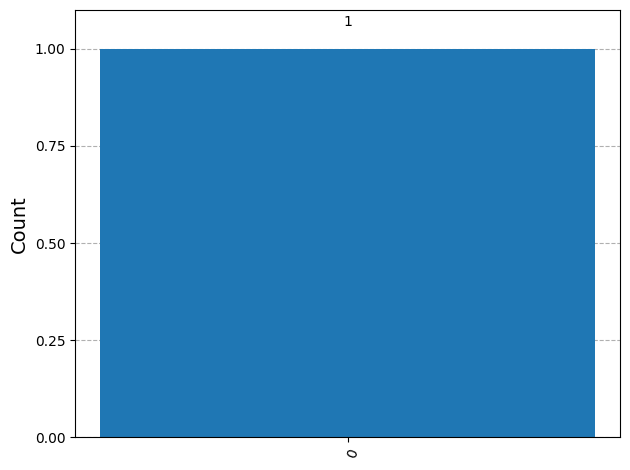

In [63]:
backend = Aer.get_backend("statevector_simulator")  # Select the statevector simulator backend

job = backend.run(qc)  # Execute the quantum circuit on the chosen backend

result = job.result()  # Retrieve the result of the execution

counts = result.get_counts()  # Get the measurement results (counts of output states)

statevector = result.get_statevector()  # Retrieve the statevector representing the quantum state

plot_histogram(counts)  # Plot a histogram of the measurement results
# 0 result ilustate that our function is constant

# balanced oracle

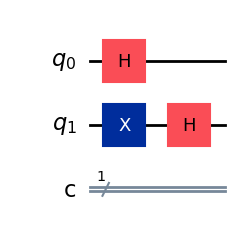

In [64]:
Dj = qiskit.QuantumCircuit(2, 1)  # Create a quantum circuit with 2 qubits and 1 classical bit

Dj.h(0)  # Apply a Hadamard gate to the first qubit (puts it in superposition)

Dj.x(1)  # Apply an X (NOT) gate to the second qubit (flips its state to |1⟩)

Dj.h(1)  # Apply a Hadamard gate to the second qubit

Dj.draw('mpl')  # Draw the quantum circuit using Matplotlib


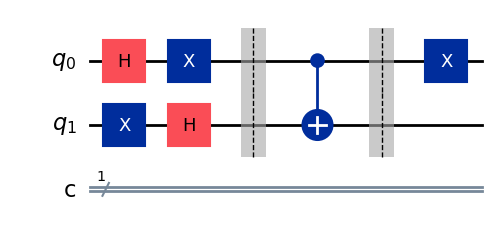

In [65]:
qc = Dj.compose(balanced_oracle)  # Combine (compose) the Dj circuit with the balanced oracle

qc.draw('mpl')  # Draw the composed quantum circuit using Matplotlib

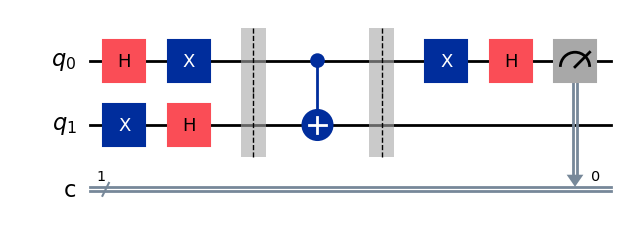

In [66]:
qc.h(0)  # Apply a Hadamard gate to the first qubit to create interference and extract information

qc.measure(0, 0)  # Measure the first qubit and store the result in the classical bit 0

qc.draw('mpl')  # Draw the quantum circuit using Matplotlib


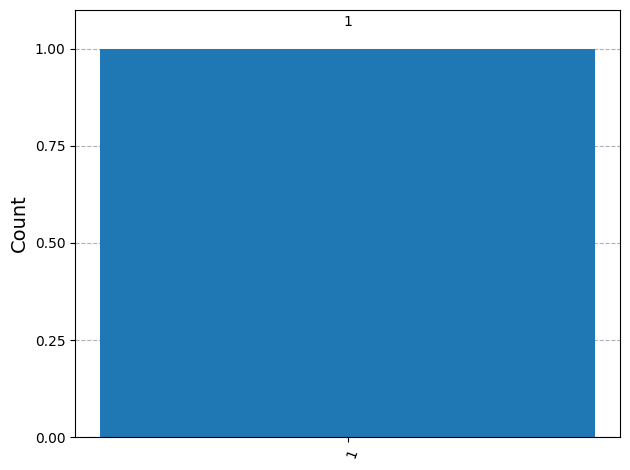

In [67]:
backend = Aer.get_backend("statevector_simulator")  # Choose the statevector simulator backend for running the quantum circuit

job = backend.run(qc)  # Execute the quantum circuit on the selected backend

result = job.result()  # Retrieve the result of the execution

counts = result.get_counts()  # Get the measurement results (counts of the output states)

statevector = result.get_statevector()  # Retrieve the statevector, which represents the quantum state

plot_histogram(counts)  # Plot a histogram to visualize the measurement results
# 1 result ilustate that our function is balanced